# `DRAP`: Database of Remote Affective Physiological Signals and Continuous Ratings Collected in Virtual Reality

Notebook containing the postprocessing stages for the DRAP dataset.

It transforms individual files containing events (.json) and physiological responses (.csv) per each participant, and produces a single file `Dataset_DRAP_full_postprocessed.csv` synchronizing: 

1) Amplitude from Physiological responses. 
2) Affect ratings.
3) Start and End of intervention stages Resting and Video for three types of video content: 
    - VideoNegative
    - VideoPositive
    - VideoNeutral

In [1]:
# Add files to sys.path
from pathlib import Path
import sys,os
this_path = None
try:    # WORKS WITH .py
    this_path = str(os.path.dirname(os.path.abspath(__file__)))
except: # WORKS WITH .ipynb
    this_path = str(Path().absolute())+"/" 
print("File Path:", this_path)

# Import classes
import drap
import utils  # Utils for generation of files and paths

# Import data science libs
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['text.usetex'] = True
#%matplotlib inline

File Path: e:\dsv\dev\git_repos\xai-in-affect-detection/


---
## SETUP

In [2]:
# CONSTANTS
import experiment_config

# All the files generated from this notebook are in a subfolder with this name
NOTEBOOK_SUBFOLDER_NAME = '1_preprocess/'

# Filenames of created files from this script
FILENAME_DATASET = str(experiment_config.PREFIX_DATASET)+str(experiment_config.DATASET_MAIN)
print(FILENAME_DATASET)

dataset_DRAP


---
## UTILITY FUNCTIONS

Generate paths to write output files

In [3]:
STR_DATASET = str(experiment_config.DATASET_MAIN)+"/"
print(STR_DATASET)
def gen_path_plot(filename):
    # Generates full paths for PLOTS just by specifying a name
    return utils.generate_complete_path(filename, \
                                        main_folder=experiment_config.PLOT_FOLDER, \
                                        subfolders=STR_DATASET+NOTEBOOK_SUBFOLDER_NAME, \
                                        file_extension=experiment_config.IMG_FORMAT, save_files=experiment_config.EXPORT_PLOTS)

def gen_path_temp(filename, subfolders="", extension=experiment_config.TEMP_FORMAT):
    # Generates full paths for TEMP FILES just by specifying a name
    return utils.generate_complete_path(filename, \
                                        main_folder=experiment_config.TEMP_FOLDER, \
                                        subfolders=STR_DATASET+subfolders, \
                                        file_extension=extension)

def gen_path_dataset(filename, subfolders="", extension=""):
    # Generates full paths for RESULTS FILES (like pandas dataframes)
    return utils.generate_complete_path(filename, \
                                        main_folder=experiment_config.DATASET_FOLDER, \
                                        subfolders=STR_DATASET+subfolders, \
                                        file_extension=extension)

DRAP/


# Load and preprocess datasets

In [4]:
dataset_root_folder = experiment_config.DATASET_ROOT_FOLDER
data_loader = drap.DatasetEmteqLabs(dataset_root_folder)

There is no index yet! Creating it in  ./datasets/DRAP/data_tree_index.json
	 Events compiled in ./datasets/DRAP/participant_101\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_216\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_219\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_222\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_246\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_247\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_248\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_268\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_270\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_278\compiled_subjective_emotions.csv
	 Events compiled in ./datasets/DRAP/participant_290\compiled_su

In [5]:
data_loader.index[0]

{'folderid': '101',
 'events': 'participant_101\\compiled_experimental_events.csv',
 'segments': 'participant_101\\compiled_segment_timestamps.csv',
 'emotions': 'participant_101\\compiled_subjective_emotions.csv',
 'data': {'fast_movement': 'participant_101\\fast_movement.csv',
  'slow_movement': 'participant_101\\slow_movement.csv',
  'video_1': 'participant_101\\video_1.csv',
  'video_2': 'participant_101\\video_2.csv',
  'video_3': 'participant_101\\video_3.csv',
  'video_4': 'participant_101\\video_4.csv',
  'video_5': 'participant_101\\video_5.csv'}}

In [7]:
# Load experimental events data
data_loader.load_event_files()
for id,events in data_loader.events.items():
    print(f"Participant {id} with folder id: {data_loader.index[id]['folderid']} has in total # events: {events.shape[0]}")

Participant 0 with folder id: 101 has in total # events: 281
Participant 1 with folder id: 216 has in total # events: 345
Participant 2 with folder id: 219 has in total # events: 207
Participant 3 with folder id: 222 has in total # events: 216
Participant 4 with folder id: 246 has in total # events: 392
Participant 5 with folder id: 247 has in total # events: 283
Participant 6 with folder id: 248 has in total # events: 297
Participant 7 with folder id: 268 has in total # events: 229
Participant 8 with folder id: 270 has in total # events: 214
Participant 9 with folder id: 278 has in total # events: 241
Participant 10 with folder id: 290 has in total # events: 195
Participant 11 with folder id: 293 has in total # events: 237
Participant 12 with folder id: 299 has in total # events: 193
Participant 13 with folder id: 307 has in total # events: 243
Participant 14 with folder id: 308 has in total # events: 250
Participant 15 with folder id: 309 has in total # events: 236
Participant 16 wit

In [8]:
data_loader.events[0].head()

,Session,Event
Time,,
1.623245e+09,fast_movement,Start of signal check. Started data recording....
1.623246e+09,fast_movement,Signal check finished. Fit state: VeryGood val...
1.623246e+09,fast_movement,Fast Movement scene started
1.623246e+09,fast_movement,Start baseline measurement
1.623246e+09,fast_movement,Fast movement object spawned. Type: LEFT Itera...


In [9]:
# Load emotions data
data_loader.load_emotion_files()
for id,emotions in data_loader.emotions.items():
    print(f"Participant {id} with folder id: {data_loader.index[id]['folderid']} has in total # self-reported emotional values: {emotions.shape[0]}")

Participant 0 with folder id: 101 has in total # self-reported emotional values: 432
Participant 1 with folder id: 216 has in total # self-reported emotional values: 1230
Participant 2 with folder id: 219 has in total # self-reported emotional values: 869
Participant 3 with folder id: 222 has in total # self-reported emotional values: 764
Participant 4 with folder id: 246 has in total # self-reported emotional values: 1261
Participant 5 with folder id: 247 has in total # self-reported emotional values: 905
Participant 6 with folder id: 248 has in total # self-reported emotional values: 1353
Participant 7 with folder id: 268 has in total # self-reported emotional values: 805
Participant 8 with folder id: 270 has in total # self-reported emotional values: 472
Participant 9 with folder id: 278 has in total # self-reported emotional values: 450
Participant 10 with folder id: 290 has in total # self-reported emotional values: 1293
Participant 11 with folder id: 293 has in total # self-repor

In [10]:
data_loader.emotions[0].head()

,Session,Valence,Arousal,RawX,RawY
Time,,,,,
1.623248e+09,video_1,3,5,94,124
1.623248e+09,video_2,5,5,128,122
1.623248e+09,video_2,6,5,149,127
1.623248e+09,video_2,7,5,170,127
1.623248e+09,video_2,8,5,193,126


In [11]:
# Load segments data
data_loader.load_segments_files()
for id,segments in data_loader.segments.items():
    print(f"Participant {id} with folder id: {data_loader.index[id]['folderid']} has in total # segments: {segments.shape[0]}")

Participant 0 with folder id: 101 has in total # segments: 68
Participant 1 with folder id: 216 has in total # segments: 68
Participant 2 with folder id: 219 has in total # segments: 68
Participant 3 with folder id: 222 has in total # segments: 68
Participant 4 with folder id: 246 has in total # segments: 68
Participant 5 with folder id: 247 has in total # segments: 68
Participant 6 with folder id: 248 has in total # segments: 68
Participant 7 with folder id: 268 has in total # segments: 68
Participant 8 with folder id: 270 has in total # segments: 68
Participant 9 with folder id: 278 has in total # segments: 68
Participant 10 with folder id: 290 has in total # segments: 68
Participant 11 with folder id: 293 has in total # segments: 68
Participant 12 with folder id: 299 has in total # segments: 68
Participant 13 with folder id: 307 has in total # segments: 68
Participant 14 with folder id: 308 has in total # segments: 68
Participant 15 with folder id: 309 has in total # segments: 68
Pa

In [12]:
data_loader.segments[0].head()

,Session,Segment,VideoId,Trigger
Time,,,,
1.623248e+09,video_2,VideoPositive,-1,Start
1.623248e+09,video_2,VideoPositive,-1,End
1.623248e+09,video_2,VideoPositive,51,Start
1.623248e+09,video_2,VideoPositive,49,Start
1.623248e+09,video_2,VideoPositive,51,End


Sensors placement

![EmteqMaskSensors](./datasets/EmteqlabReferenceSensors.jpg)

In [13]:
# Example to load all variables types from a single facial EMG muscle Center Corrugator
COLNAMES_CENTER_CORRUGATOR=drap.GetColnamesFromEmgMuscle(drap.EmgMuscles.CenterCorrugator)
data, metadata = data_loader.load_data_from_participant(participant_idx = 0, session_part="video_1", columns = COLNAMES_CENTER_CORRUGATOR)
data.head()

Loading from:  ./datasets/DRAP/participant_101\video_1.csv


,Emg/ContactStates[CenterCorrugator],Emg/Contact[CenterCorrugator],Emg/Raw[CenterCorrugator],Emg/RawLift[CenterCorrugator],Emg/Filtered[CenterCorrugator],Emg/Amplitude[CenterCorrugator]
Time,,,,,,
1.623248e+09,255,2179,-437726,0,-619,1378
1.623248e+09,255,2179,-437726,0,1367,1378
1.623248e+09,255,2179,-437726,0,-863,1378
1.623248e+09,255,2179,-437726,0,916,1378
1.623248e+09,255,2179,-437726,0,-828,1378


In [15]:
# Get the column names for all variables of interest in the rest of the analysis
VARS_OF_INTEREST = drap.GetColnamesBasicsNonEmg() + drap.GetColnamesFromEmgVariableType(drap.EmgVars.Amplitude)
VARS_OF_INTEREST

['HeartRate/Average',
 'Ppg/Raw.ppg',
 'Accelerometer/Raw.x',
 'Accelerometer/Raw.y',
 'Accelerometer/Raw.z',
 'Emg/Amplitude[RightFrontalis]',
 'Emg/Amplitude[RightZygomaticus]',
 'Emg/Amplitude[RightOrbicularis]',
 'Emg/Amplitude[CenterCorrugator]',
 'Emg/Amplitude[LeftOrbicularis]',
 'Emg/Amplitude[LeftZygomaticus]',
 'Emg/Amplitude[LeftFrontalis]']

In [16]:
data, metadata = data_loader.load_data_from_participant(participant_idx = 0, session_part="video_1", columns = VARS_OF_INTEREST)
data.head()

Loading from:  ./datasets/DRAP/participant_101\video_1.csv


,HeartRate/Average,Ppg/Raw.ppg,Accelerometer/Raw.x,Accelerometer/Raw.y,Accelerometer/Raw.z,Emg/Amplitude[RightFrontalis],Emg/Amplitude[RightZygomaticus],Emg/Amplitude[RightOrbicularis],Emg/Amplitude[CenterCorrugator],Emg/Amplitude[LeftOrbicularis],Emg/Amplitude[LeftZygomaticus],Emg/Amplitude[LeftFrontalis]
Time,,,,,,,,,,,,
1.623248e+09,0.0,21504,874,31,-417,1450,1325,1426,1378,1671,1308,1633
1.623248e+09,0.0,21504,874,31,-417,1478,1348,1482,1418,1789,1334,1762
1.623248e+09,0.0,21504,879,33,-417,1478,1348,1482,1418,1789,1334,1762
1.623248e+09,0.0,22288,881,35,-421,1478,1348,1482,1418,1789,1334,1762
1.623248e+09,0.0,22288,881,35,-421,1480,1350,1484,1420,1791,1336,1764


In [17]:
metadata

,value
metadata,
#File/Normalised,NO
#Time/Epoch,Unix
#File/Source,E:\dsv\dev\git_repos\xai-in-affect-detection\d...
#Protocol/Version,MASK.1.2
#Firmware/Build.buildTag,v0.4.4-0-g2e9aa13
#Device/Version.serialId,DAB006G+TM5OVMgICA4FEQQ/w
#Device/Version.hardware,9.3.6-Mobile
#Protocol/Log.message,AT21CS01 DeviceAddress=0
#Faceplate/Version.serial,FLXoHHLagAAgdw


In [19]:
data.describe()

,HeartRate/Average,Ppg/Raw.ppg,Accelerometer/Raw.x,Accelerometer/Raw.y,Accelerometer/Raw.z,Emg/Amplitude[RightFrontalis],Emg/Amplitude[RightZygomaticus],Emg/Amplitude[RightOrbicularis],Emg/Amplitude[CenterCorrugator],Emg/Amplitude[LeftOrbicularis],Emg/Amplitude[LeftZygomaticus],Emg/Amplitude[LeftFrontalis]
count,15333.000000,15333.000000,15333.000000,15333.000000,15333.000000,15333.000000,15333.000000,15333.000000,15333.000000,15333.000000,15333.000000,15333.000000
mean,76.472906,22580.378530,858.689493,30.641362,-449.487837,27.548099,43.699602,42.409183,35.071480,37.742712,40.875693,29.498272
std,3.765279,5498.590288,22.169171,13.859534,36.626259,35.368055,40.891990,41.648527,43.806182,44.188994,47.038101,39.547708
min,0.000000,7824.000000,726.000000,-55.000000,-559.000000,17.000000,19.000000,17.000000,19.000000,15.000000,17.000000,17.000000
25%,73.820000,18064.000000,845.000000,23.000000,-476.000000,23.000000,27.000000,25.000000,27.000000,25.000000,25.000000,24.000000
50%,76.580000,22496.000000,856.000000,34.000000,-457.000000,25.000000,32.000000,29.000000,29.000000,29.000000,29.000000,26.000000
75%,78.610000,27264.000000,872.000000,40.000000,-429.000000,27.000000,47.000000,49.000000,33.000000,41.000000,39.000000,29.000000
max,81.610000,43920.000000,1088.000000,95.000000,-273.000000,1480.000000,1350.000000,1484.000000,1420.000000,1791.000000,1336.000000,1764.000000


array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>],
      dtype=object)

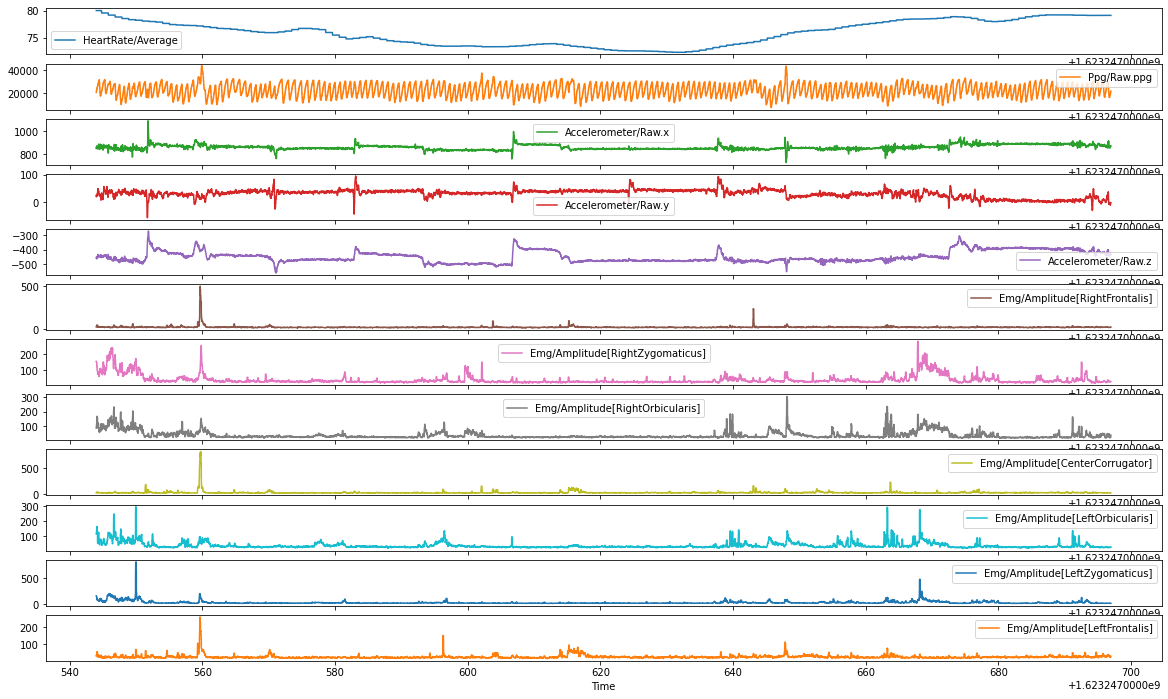

In [20]:
# Exploratory visualization of all data samples
data.iloc[2000:].plot.line(subplots=True, figsize=(20,1*data.shape[1]), sharex=True)

## Iterating over all participants

In [21]:
# Total participants
participants_ids = data_loader.index.keys()
participants_ids

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

In [22]:
# Total sessions
experimental_stages_ids = [ str(session) for session in data_loader.SessionSegment ]
experimental_stages_ids

['fast_movement',
 'slow_movement',
 'video_1',
 'video_2',
 'video_3',
 'video_4',
 'video_5']

In [23]:
# ### Test to know how long it would take to load all the dataset of interest
# import time
# for participant in participants_ids:
#     for exp_stage in experimental_stages_ids:
#         t0 = time.time()
#         data, metadata = data_loader.load_data_from_participant(participant_idx = participant, session_part = exp_stage, columns=VARS_OF_INTEREST)
#         print(f"\t>> Loading time: {time.time()-t0} s")

# print("\n\n=======\nFinished loading all relevant data!") 

# ### It took around 4.5mins just loading all the datasets

In [24]:
# Extract the sequence order of the videos

for SYNC_TIME_USER_ID in participants_ids:
    MASK_QUERY = ( 
                # data_loader.events[SYNC_TIME_USER_ID].Event.str.startswith( "Playing category number: " ) | \
                    # data_loader.events[SYNC_TIME_USER_ID].Event.str.startswith( "Video category finished" ) | \
                        # data_loader.events[SYNC_TIME_USER_ID].Event.str.startswith( "Playing rest video" ) | \
                            # data_loader.events[SYNC_TIME_USER_ID].Event.str.startswith( "Finished playing rest video" ) \
                    data_loader.events[SYNC_TIME_USER_ID].Event.str.startswith( "Playing" ) \
                    )
    
    # Event sequence
    EVENT_TEXT_SEQUENCE = "Category sequence:"
    keys_containing_sync_event = data_loader.events[SYNC_TIME_USER_ID].Event.str.startswith(EVENT_TEXT_SEQUENCE)
    cat_sequence = data_loader.events[SYNC_TIME_USER_ID][ keys_containing_sync_event ].iloc[0] # Choose first event
    video_seq = cat_sequence.Event.split(":")[1].split(",")

    print(f"Participant: {SYNC_TIME_USER_ID}, Events: {data_loader.events[SYNC_TIME_USER_ID][MASK_QUERY].shape}, Seq: {video_seq}")


Participant: 0, Events: (37, 2), Seq: [' Positive', ' Negative', ' Neutral']
Participant: 1, Events: (37, 2), Seq: [' Positive', ' Neutral', ' Negative']
Participant: 2, Events: (37, 2), Seq: [' Neutral', ' Positive', ' Negative']
Participant: 3, Events: (37, 2), Seq: [' Positive', ' Negative', ' Neutral']
Participant: 4, Events: (37, 2), Seq: [' Positive', ' Negative', ' Neutral']
Participant: 5, Events: (37, 2), Seq: [' Negative', ' Neutral', ' Positive']
Participant: 6, Events: (37, 2), Seq: [' Neutral', ' Negative', ' Positive']
Participant: 7, Events: (37, 2), Seq: [' Positive', ' Neutral', ' Negative']
Participant: 8, Events: (37, 2), Seq: [' Negative', ' Neutral', ' Positive']
Participant: 9, Events: (37, 2), Seq: [' Positive', ' Negative', ' Neutral']
Participant: 10, Events: (37, 2), Seq: [' Neutral', ' Positive', ' Negative']
Participant: 11, Events: (37, 2), Seq: [' Negative', ' Neutral', ' Positive']
Participant: 12, Events: (37, 2), Seq: [' Positive', ' Neutral', ' Negativ

## Testing pipeline to merge physiological and continuous affective ratings

The merging pipeline assumes a Participant ID, and the experimental stage to process (*VideoNegative, VideoNeutral, VideoPositive*)
1. Identify the timestamps for the resting stage $[r_{t0},r_{t1}]$ and the stage watching the video $[v_{t0},v_{t1}]$
2. Find the VideoID of the content being watched at each moment (facilitates filtering per video, if desired)
3. Merge the physiological and emotional data with corresponding timestamps.
4. Resample the dataframes at 50Hz
5. Save the merged dataset in a CSV file

In [25]:
## Participant and Video stage to process
PARTICIPANT_IDX = 7
EXPERIMENTAL_STAGE_NAME = "VideoPositive"

Identify timestamps dividing resting and video stages within segment

In [26]:
def calculate_info_from_segment(df_segments, segment_name_to_filter):
    """
    Processes a dataframe of segments timestamps and returns a tuple with:
        - rest_tstamp_start
        - rest_tstamp_end
        - video_tstamp_start
        - video_tstamp_end
        - video_filename
    """

    # Filter the segment corresponding to the intended video
    df_segments = df_segments[ df_segments.Segment == segment_name_to_filter]

    # Find the beginning and end of the RESTING (VideoId == -1)
    rest_start = df_segments[ (df_segments.Trigger=="Start") & (df_segments.VideoId == -1)].index.min()
    rest_end = df_segments[ (df_segments.Trigger=="End") & (df_segments.VideoId == -1)].index.max()

    # The segment watching the VIDEO (VideoId != -1)
    video_start = df_segments[ (df_segments.Trigger=="Start") & (df_segments.VideoId != -1)].index.min()
    video_end = df_segments[ (df_segments.Trigger=="End") & (df_segments.VideoId != -1)].index.max()

    # Which file should be loaded to access the required data
    video_filename = df_segments.Session.iloc[0]

    # Correct the few situations when the video starts before resting ends for few miliseconds
    if rest_end > video_start:
        video_start = rest_end
    
    return (rest_start, rest_end, video_start, video_end, video_filename)

In [27]:
r_t0, r_t1, v_t0, v_t1, video_filename = calculate_info_from_segment(data_loader.segments[PARTICIPANT_IDX], EXPERIMENTAL_STAGE_NAME)
print(f"Participant: \t\t{PARTICIPANT_IDX} \nRest duration: \t\t{r_t1-r_t0}s, \nVideos duration: \t{v_t1-v_t0} \nVideoName: \t\t{video_filename} \nResting was first: \t{r_t0 < v_t0}")

Participant: 		7 
Rest duration: 		120.02600002288818s, 
Videos duration: 	300.143000125885 
VideoName: 		video_2 
Resting was first: 	True


In [28]:
# Load video corresponding to desired Experimental stage
data, metadata = data_loader.load_data_from_participant(participant_idx = PARTICIPANT_IDX, session_part = video_filename, columns = VARS_OF_INTEREST)

Loading from:  ./datasets/DRAP/participant_268\video_2.csv


Filter experimental stages

In [29]:
# Filter experimental stages
data_rest = data[ (data.index >= r_t0) & (data.index < r_t1) ]
data_video = data[ (data.index >= v_t0) & (data.index < v_t1) ]

print(data_rest.shape, data_video.shape)
print("Duration stage REST: ", r_t1-r_t0)
print("Duration stage VIDEO: ", v_t1-v_t0)

(14653, 12) (5895, 12)
Duration stage REST:  120.02600002288818
Duration stage VIDEO:  300.143000125885


In [30]:
# data_video.plot.line(subplots=True, figsize=(15,1*data.shape[1]), sharex=True)

Load emotional responses within video range

In [31]:
# Emotions reported during the video, and in the corresponding video
Q = (data_loader.emotions[PARTICIPANT_IDX].index >= v_t0) & \
        (data_loader.emotions[PARTICIPANT_IDX].index < v_t1 ) & \
        (data_loader.emotions[PARTICIPANT_IDX].Session == video_filename)
        
data_emotions = data_loader.emotions[PARTICIPANT_IDX][ Q ].drop("Session", axis=1)
data_emotions.head()

,Valence,Arousal,RawX,RawY
Time,,,,
1.621888e+09,8,2,189,69
1.621888e+09,7,3,175,87
1.621888e+09,7,4,163,103
1.621888e+09,6,5,149,116
1.621888e+09,5,5,139,123


Find the VideoId per timestamp

In [32]:
def calculate_video_id_end_timestamps(df_segments, segment_name_to_filter):
    """
    Returns a dataframe with the timestamp where a given VideoID *finishes*.
        - df_segments = DataFrame with segments
    """
    # EVENT_TEXT_SEQUENCE = "Finished playing video number:" # It will return when the event finished!
    # keys_containing_sync_event = df_events.Event.str.startswith(EVENT_TEXT_SEQUENCE)
    # videos_seq = df_events[ keys_containing_sync_event ] # Choose all video numbers
    # videos_ending = videos_seq.Event.str.split(":")
    # video_id_end_timestamp = videos_ending.apply((lambda x: int(x[1])))
    # video_id_end_timestamp = pd.DataFrame({"VideoID":video_id_end_timestamp})

    # Filter the segment corresponding to the intended video
    df_segments = df_segments[ df_segments.Segment == segment_name_to_filter]

    # Find the end of each video stage
    video_id_end_timestamp = df_segments[ (df_segments.Trigger=="End") ]
    video_id_end_timestamp = video_id_end_timestamp[ ["VideoId"] ]
    
    return video_id_end_timestamp

In [33]:
video_id_end_timestamp = calculate_video_id_end_timestamps(data_loader.segments[PARTICIPANT_IDX], EXPERIMENTAL_STAGE_NAME)
video_id_end_timestamp

,VideoId
Time,
1.621888e+09,-1
1.621888e+09,51
1.621888e+09,57
1.621888e+09,58
1.621888e+09,48
1.621888e+09,55
1.621888e+09,41
1.621889e+09,49
1.621889e+09,56


In [34]:
video_id_end_timestamp.index

Float64Index([1621888308.151, 1621888338.173,  1621888368.19,   1621888398.2,
              1621888428.222, 1621888458.244, 1621888488.265, 1621888518.263,
              1621888548.302, 1621888578.305, 1621888608.321],
             dtype='float64', name='Time')

In [35]:
print(r_t0, r_t1)
print(v_t0, v_t1)

1621888188.125 1621888308.151
1621888308.178 1621888608.321


In [36]:
data_rest = pd.merge_asof(data_rest, video_id_end_timestamp, left_index=True, right_index=True, direction="forward")
data_rest["VideoId"].value_counts()

-1    14653
Name: VideoId, dtype: int64

In [37]:
data_video = pd.merge_asof(data_video, video_id_end_timestamp, left_index=True, right_index=True, direction="forward")
data_video["VideoId"].value_counts()

51    3659
57    2236
Name: VideoId, dtype: int64

In [38]:
data_rest.insert(0, "OriginalParticipantID", data_loader.index[PARTICIPANT_IDX]['folderid'])
data_video.insert(0, "OriginalParticipantID", data_loader.index[PARTICIPANT_IDX]['folderid'])
data_video

,OriginalParticipantID,HeartRate/Average,Ppg/Raw.ppg,Accelerometer/Raw.x,Accelerometer/Raw.y,Accelerometer/Raw.z,Emg/Amplitude[RightFrontalis],Emg/Amplitude[RightZygomaticus],Emg/Amplitude[RightOrbicularis],Emg/Amplitude[CenterCorrugator],Emg/Amplitude[LeftOrbicularis],Emg/Amplitude[LeftZygomaticus],Emg/Amplitude[LeftFrontalis],VideoId
Time,,,,,,,,,,,,,,
1.621888e+09,268,68.29,17376,876,-73,-420,35,105,51,36,128,82,62,51
1.621888e+09,268,68.29,17376,878,-67,-420,35,105,51,36,128,82,62,51
1.621888e+09,268,68.29,17872,878,-67,-420,35,105,51,36,128,82,62,51
1.621888e+09,268,68.29,17872,878,-67,-420,34,123,46,40,142,87,69,51
1.621888e+09,268,68.29,17872,879,-70,-419,34,123,46,40,142,87,69,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.621888e+09,268,66.95,26800,904,87,-318,57,33,0,285,29,37,79,57
1.621888e+09,268,66.95,26800,904,87,-318,55,33,0,255,27,35,86,57
1.621888e+09,268,66.95,26800,902,89,-322,55,33,0,255,27,35,86,57


Merging physiology with affective ratings

In [39]:
# Merge physio with subjective emotions
data_merged = pd.merge_asof(data_video, data_emotions, left_index=True, right_index=True)

In [40]:
print("RANGE VIDEO: \t\t", data_video.index.min(), "---", data_video.index.max(), " \tLength:", data_video.index.max()-data_video.index.min())
print("RANGE EMOTIONS: \t", data_emotions.index.min(), "---", data_emotions.index.max(), " \tLength:", data_emotions.index.max()-data_emotions.index.min())

RANGE VIDEO: 		 1621888308.19424 --- 1621888356.50894  	Length: 48.31469988822937
RANGE EMOTIONS: 	 1621888310.494 --- 1621888595.881  	Length: 285.38700008392334


In [ ]:
# data_merged.plot.line(subplots=True, figsize=(15,1*data.shape[1]), sharex=True)

Resample data at 50Hz

In [ ]:
def calculate_resampled_dataframe(df, sampling_frequency_hz = 50):
    df.index = pd.to_datetime(df.index, unit="s")
    _FS = sampling_frequency_hz
    df_resampled = df.resample(str(1/_FS)+'S', origin='start').ffill()
    # The valence, arousal, rawX, rawY will contain null values before the first value is captured. Fill with first value.
    df_resampled = df_resampled.fillna(method="backfill")
    # Put the data back to 0 seconds
    df_resampled.index -= df_resampled.index[0]
    # Transform from datetime to float
    df_resampled.index = df_resampled.index.total_seconds()
    return df_resampled

In [ ]:
# Resample to 50Hz
FS = 50
data_total = calculate_resampled_dataframe(data_merged, FS)
data_total.head()

In [ ]:
# Missing values
data_total.isnull().sum()

In [ ]:
data_total.plot.line(subplots=True, figsize=(15,1*data.shape[1]), sharex=True)#[0].figure.savefig(gen_path_temp(f"fig_test_data", extension=".png"))

Testing the merging process with fake data

In [ ]:
# Merge two fake dataframes with MultiIndex
data2 = data_total.copy(deep=True)
data3 = data_total.copy(deep=True)

# Adding index with participant and video category
data_total = pd.concat({(PARTICIPANT_IDX,EXPERIMENTAL_STAGE_NAME):data_total}, names = ["Participant","VideoCategory"])
data_total.head()
# Toy data to prove how to merge fake "VideoPositive" data vertically
data2 = pd.concat({(PARTICIPANT_IDX,"VideoPositive"):data2}, names = ["Participant","VideoCategory"])
data_total = pd.concat([data_total, data2])
# Toy data to combine fake "VideoNeutral" vertically
data3 = pd.concat({(PARTICIPANT_IDX,"VideoNeutral"):data3}, names = ["Participant","VideoCategory"])
data_total = pd.concat([data_total, data3])
data_total

In [ ]:
# Save data from a single participant and single experimental session
data_total.to_csv(gen_path_temp("example_df",extension=".csv"))

## Create dataset merging all data

Loading all segments for all participants and store the resting and video parts in a single large CSV

In [ ]:
# Where the compiled dataset will be stored
DATASET_POSTPROCESSED_FILENAME = gen_path_temp("Dataset_DRAP_full_postprocessed", extension=".csv")

# Besides the compiled dataset in .CSV, it generates a folder with individual datasets per 
# participant, and with plots that show the saved data
SAVE_SINGLE_FILES_AND_PLOTS = False

# Segments of interest. The timestamps that determine each stage will be found and used to segment the physiological data per participant.
VIDEO_SEGMENT_NAMES = ["VideoNegative", "VideoPositive", "VideoNeutral"]    # Key of experimental stages
PREFIX_RESTING_STAGE = "Resting_"
FS = 50 # Sampling frequency

# Load or create dataframe with statistics of initial dataset
dataset_postprocessed_final = None

### INPUTS / OUTPUTS
"""EDIT CUSTOM FILENAMES"""
input_files = [DATASET_POSTPROCESSED_FILENAME]

# Try to load files maximum two times
RELOAD_TRIES = 2
for tries in range(RELOAD_TRIES):
    try:
        ### LOAD FILE
        print(f"Trying {tries+1}/{RELOAD_TRIES} to load files: {input_files}")
        
        ### CUSTOM SECTION TO READ FILES
        """EDIT CUSTOM READ"""
        dataset_postprocessed_final = pd.read_csv(input_files[0])#, index_col=[0,1,2])
        print(f"File {input_files[0]} was successfully loaded")

    except Exception as e:
        ### CREATE FILE
        print(f"File not found. Creating again! {e}")

        ### CUSTOM SECTION TO CREATE FILES 
        """EDIT CUSTOM WRITE"""

        for PARTICIPANT_IDX in participants_ids:
            for EXPERIMENTAL_STAGE_NAME in VIDEO_SEGMENT_NAMES:

                ## Extract segments for specific video type
                r_t0, r_t1, v_t0, v_t1, video_filename = calculate_info_from_segment(data_loader.segments[PARTICIPANT_IDX], EXPERIMENTAL_STAGE_NAME)
                print(f"\n\nParticipant: \t\t{PARTICIPANT_IDX} \nRest range: \t\t{r_t1-r_t0}s, \nVideos range: \t{v_t1-v_t0} \nVideo filename: \t\t{video_filename} \nResting was first: \t{r_t0 < v_t0}")

                # Load corresponding data and metadata
                data, metadata = data_loader.load_data_from_participant(participant_idx = PARTICIPANT_IDX, session_part = video_filename, columns = VARS_OF_INTEREST)
                
                # Detect the ending timestamp of each VideoID to be added to the datasets
                video_id_end_timestamp = calculate_video_id_end_timestamps(data_loader.segments[PARTICIPANT_IDX], EXPERIMENTAL_STAGE_NAME)
                
                """ PROCESSING DATA FROM RESTING STAGES """
                # Filter experimental stages
                data_rest = data[ (data.index >= r_t0) & (data.index < r_t1) ]
                # Combine the videoId with the data from the segment
                data_rest = pd.merge_asof(data_rest,  video_id_end_timestamp, left_index=True, right_index=True, direction="forward")

                # Emotions reported during the video, and in the corresponding video
                Q = (data_loader.emotions[PARTICIPANT_IDX].index >= r_t0) & \
                        (data_loader.emotions[PARTICIPANT_IDX].index < r_t1 ) & \
                        (data_loader.emotions[PARTICIPANT_IDX].Session == video_filename)
                data_emotions_rest = data_loader.emotions[PARTICIPANT_IDX][ Q ].drop("Session", axis=1)
                # Merge data end emotions in a single dataframe per time
                data_rest = pd.merge_asof(data_rest, data_emotions_rest, left_index=True, right_index=True)

                # Resampling data
                data_rest_resampled = calculate_resampled_dataframe(data_rest, FS)

                """ PROCESSING DATA FROM VIDEO STAGES """
                # Filter experimental stages
                data_video = data[ (data.index >= v_t0) & (data.index < v_t1) ]
                # Combine the videoId with the data from the segment
                data_video = pd.merge_asof(data_video, video_id_end_timestamp, left_index=True, right_index=True, direction="forward")
                
                # Emotions reported during the video, and in the corresponding video
                Q = (data_loader.emotions[PARTICIPANT_IDX].index >= v_t0) & \
                        (data_loader.emotions[PARTICIPANT_IDX].index < v_t1 ) & \
                        (data_loader.emotions[PARTICIPANT_IDX].Session == video_filename)
                data_emotions = data_loader.emotions[PARTICIPANT_IDX][ Q ].drop("Session", axis=1)
                
                # Merge data end emotions in a single dataframe per time
                data_video = pd.merge_asof(data_video, data_emotions, left_index=True, right_index=True)
                # Resample dataset to constant period
                data_video_resampled = calculate_resampled_dataframe(data_video, FS)

                """ COMBINING DATASET IN A SINGLE ONE """
                print(f"Actual duration stage VIDEO: {data_video_resampled.index.max()} \tSHORT?:{data_video_resampled.index.max()<295}")
                print(f"Actual duration stage REST: {data_rest_resampled.index.max()} \tSHORT?:{data_rest_resampled.index.max()<115}")
                print(f"Total missing vals:{data_video_resampled.isnull().sum().sum()}")

                # Add a column with the original participant ID corresponding to the original dataset
                folder_id = data_loader.index[PARTICIPANT_IDX]['folderid']
                data_rest_resampled.insert(0, "OriginalParticipantID", folder_id)
                data_video_resampled.insert(0, "OriginalParticipantID", folder_id)

                ### SAVING FILES
                if SAVE_SINGLE_FILES_AND_PLOTS:
                    # Save resting data
                    data_to_plot = {
                                        "video_data":data_video_resampled,
                                        "resting_data":data_rest_resampled
                                    }
                    for _df_name,_df in data_to_plot.items():
                        # Save video data
                        save_path_plot = gen_path_temp(f"per_participant/_plots/{folder_id}/{EXPERIMENTAL_STAGE_NAME}_{_df_name}", extension=".png")
                        save_path_csv = gen_path_temp(f"per_participant/{folder_id}/{EXPERIMENTAL_STAGE_NAME}_{_df_name}", extension=".csv")
                        _df.plot.line(subplots=True, figsize=(15,1*_df.shape[1]), sharex=True)[0].figure.savefig(save_path_plot); plt.close()
                        _df.to_csv(save_path_csv)

                ### Generating multiindex to create a single .csv with all the data
                COLNAMES_MULTIINDEX = ["Participant","Stage"]
                data_video_resampled = pd.concat({(PARTICIPANT_IDX,EXPERIMENTAL_STAGE_NAME):data_video_resampled}, names = COLNAMES_MULTIINDEX)
                data_rest_resampled = pd.concat({(PARTICIPANT_IDX, PREFIX_RESTING_STAGE + EXPERIMENTAL_STAGE_NAME):data_rest_resampled}, names = COLNAMES_MULTIINDEX)

                # Final concatenation of resting and video stages
                data_compiled = pd.concat([data_video_resampled.copy(deep=True), data_rest_resampled.copy(deep=True)])

                # Generate final DF
                if(dataset_postprocessed_final is None):
                    dataset_postprocessed_final = data_compiled.copy(deep=True)
                    # dataset_postprocessed_final = pd.concat([dataset_postprocessed_final, data_rest_resampled.copy(deep=True)])
                else:
                    dataset_postprocessed_final = pd.concat([dataset_postprocessed_final, data_compiled.copy(deep=True)])
                    # dataset_postprocessed_final = pd.concat([dataset_postprocessed_final, data_rest_resampled.copy(deep=True)])

        # Saving .csv
        dataset_postprocessed_final.to_csv( DATASET_POSTPROCESSED_FILENAME )
        print("\n\n End")


        ### ---- CONTROL RETRIES
        if tries+1 < RELOAD_TRIES:
            continue
        else:
            raise
    
    # Finish iteration
    break

In [ ]:
dataset_postprocessed_final.head()

In [ ]:
dataset_postprocessed_final.shape

In [ ]:
print(">> FINISHED WITHOUT ERRORS!!")